<a href="https://colab.research.google.com/github/shapatel13/bamboolib/blob/master/2_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
df= pd.read_csv('/content/drive/My Drive/nosepsispf1.csv')

# New Section

# New Section

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

patientunitstayid - 0.0%
ANIONGAP_min - 23.0%
ANIONGAP_max - 23.0%
ALBUMIN_min - 31.0%
ALBUMIN_max - 31.0%
BICARBONATE_min - 9.0%
BICARBONATE_max - 9.0%
CREATININE_max - 3.0%
CHLORIDE_min - 4.0%
CHLORIDE_max - 4.0%
GLUCOSE_min - 4.0%
GLUCOSE_max - 4.0%
HEMATOCRIT_min - 4.0%
LACTATE_min - 62.0%
LACTATE_max - 62.0%
PLATELET_min - 5.0%
INR_max - 38.0%
PT_max - 40.0%
SODIUM_min - 3.0%
SODIUM_max - 3.0%
BILIRUBIN_max - 34.0%
BUN_min - 4.0%
BUN_max - 4.0%
PLATELET_max - 5.0%
WBC_min - 4.0%
WBC_max - 4.0%
gender - 0.0%
age - 4.0%
day1verbal - 0.0%
day1motor - 0.0%
day1eyes - 0.0%
admitdiagnosis - 1.0%
aids - 0.0%
hepaticfailure - 0.0%
lymphoma - 0.0%
metastaticcancer - 0.0%
leukemia - 0.0%
diabetes - 0.0%
actualicumortality - 0.0%


In [0]:
pip install impyute

In [0]:
df=df[df["day1eyes"] > 0]
df=df[df["day1motor"] > 0]
df=df[df["day1verbal"] > 0]
df=df[df["age"] > 17]

In [0]:
df=df.drop(columns='patientunitstayid')

In [0]:
df=df.drop(columns='admitdiagnosis')

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ANIONGAP_min - 23.0%
ANIONGAP_max - 23.0%
ALBUMIN_min - 31.0%
ALBUMIN_max - 31.0%
BICARBONATE_min - 8.0%
BICARBONATE_max - 8.0%
CREATININE_max - 3.0%
CHLORIDE_min - 4.0%
CHLORIDE_max - 4.0%
GLUCOSE_min - 4.0%
GLUCOSE_max - 4.0%
HEMATOCRIT_min - 4.0%
LACTATE_min - 63.0%
LACTATE_max - 63.0%
PLATELET_min - 5.0%
INR_max - 38.0%
PT_max - 40.0%
SODIUM_min - 3.0%
SODIUM_max - 3.0%
BILIRUBIN_max - 34.0%
BUN_min - 4.0%
BUN_max - 4.0%
PLATELET_max - 5.0%
WBC_min - 4.0%
WBC_max - 4.0%
gender - 0.0%
age - 0.0%
day1verbal - 0.0%
day1motor - 0.0%
day1eyes - 0.0%
aids - 0.0%
hepaticfailure - 0.0%
lymphoma - 0.0%
metastaticcancer - 0.0%
leukemia - 0.0%
diabetes - 0.0%
actualicumortality - 0.0%


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140738 entries, 0 to 148531
Data columns (total 37 columns):
ANIONGAP_min          108183 non-null float64
ANIONGAP_max          108183 non-null float64
ALBUMIN_min           97579 non-null float64
ALBUMIN_max           97579 non-null float64
BICARBONATE_min       128781 non-null float64
BICARBONATE_max       128781 non-null float64
CREATININE_max        135972 non-null float64
CHLORIDE_min          135151 non-null float64
CHLORIDE_max          135151 non-null float64
GLUCOSE_min           135327 non-null float64
GLUCOSE_max           135327 non-null float64
HEMATOCRIT_min        135619 non-null float64
LACTATE_min           52671 non-null float64
LACTATE_max           52671 non-null float64
PLATELET_min          133385 non-null float64
INR_max               87360 non-null float64
PT_max                84821 non-null float64
SODIUM_min            135943 non-null float64
SODIUM_max            135943 non-null float64
BILIRUBIN_max        

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:

X =  df[[	'BICARBONATE_min','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'PLATELET_min',	
         'INR_max','WBC_min','BUN_max']]

In [0]:

X =  df[[	'LACTATE_max','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'PLATELET_min',	
         'PT_max','WBC_min','BUN_max']]

In [0]:
y=df['actualicumortality']

In [0]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [0]:
import pandas as pd
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

In [0]:
imputer = IterativeImputer(BayesianRidge())
X = pd.DataFrame(imputer.fit_transform(X))

In [17]:
pip install imblearn

In [0]:
pipeline = Pipeline([('scale', StandardScaler()),("clf",XGBClassifier(max_depth=3))])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pipeline  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression( ))])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [20]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [0]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 




In [0]:
gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='roc_auc',
			cv=5) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='roc_auc',
			cv=5)

In [24]:
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                

In [0]:
print(gs_lr.best_score_)#nosmote
print(gs_lr.best_estimator_)#no smote

0.852276924309634
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [25]:
print(gs_lr.best_score_)#smote
print(gs_lr.best_estimator_)#smote

0.8709996388663319
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [28]:
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
my_model = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=5, verbose=1)

# Fit the estimator
my_model.fit(X_test,y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was pas

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scale',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('clf',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
                             

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.metrics import roc_auc_score

In [30]:
print(my_model.best_score_)#.5smotetrain
print(my_model.best_estimator_)#.5smotetrain

0.8062267374815664
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               learning_rate=0.7500000000000001,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)


In [0]:
print(randomized_roc_auc.best_score_) #No smote
print(randomized_roc_auc.best_estimator_) No Smote

SyntaxError: ignored

In [0]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 81.7min


In [0]:
print(clf.best_score_)
print(clf.best_estimator_)

In [0]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
y_pred= pipe_lr.predict(X_test)

In [0]:
y_train=pd.DataFrame(y_train)

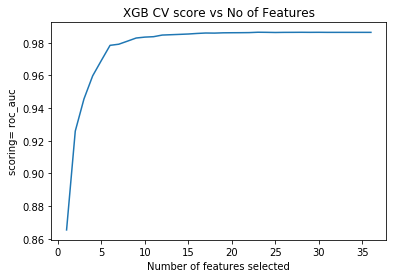

In [0]:
estimator = XGBClassifier()
selector = RFECV(estimator, step=1, min_features_to_select=1, cv=10, scoring='roc_auc')

#fit the model, get a rank of the variables, and a matrix of the selected X variables
selector = selector.fit(X_train, y_train.values.flatten())


#PLot # of features selected vs. Model Score
plt.figure()
plt.title('XGB CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel('scoring= roc_auc')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

#get rank of X model features
rank = selector.ranking_
#Subset features to those selected by recursive feature elimination
#X_train_scaled = X_train_scaled[:,selector.support_ ] 

y_pred = selector.predict(X_train)